<a href="https://colab.research.google.com/github/LordLean/Computer-Vision/blob/master/CV_Labs/CV_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Overview
This lab session will all be done by filling in the blanks in this Google Colab sheet.
You'll need a google account to continue, but it's pretty straightforward to sign up if you don't have one already.

The best thing to do would be to save a copy of this notebook in your personal google drive and edit it from there.

# Getting Data
**Getting an image from the web** (for uploading an image file, go to the section "Uploading an image file")

In [2]:
!wget "http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg" -O sussex.jpg
!wget "http://users.sussex.ac.uk/~is321/sad_snowman.jpg" -O sad_snowman.jpg
!wget "http://users.sussex.ac.uk/~is321/bri_beach.jpg" -O bri_beach.jpg


--2020-02-15 17:29:02--  http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg
Resolving www.sussex.ac.uk (www.sussex.ac.uk)... 139.184.32.51
Connecting to www.sussex.ac.uk (www.sussex.ac.uk)|139.184.32.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28074 (27K) [image/jpeg]
Saving to: ‘sussex.jpg’

sussex.jpg          100%[===================>]  27.42K  59.4KB/s    in 0.5s    

2020-02-15 17:29:03 (59.4 KB/s) - ‘sussex.jpg’ saved [28074/28074]

--2020-02-15 17:29:05--  http://users.sussex.ac.uk/~is321/sad_snowman.jpg
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395733 (386K) [image/jpeg]
Saving to: ‘sad_snowman.jpg’

sad_snowman.jpg     100%[===================>] 386.46K   345KB/s    in 1.1s    

2020-02-15 17:29:07 (345 KB/s) - ‘sad_snowman.jpg’ saved [395733/395733]

--2020-02

# Common Packages
As we've seen before there are some common packages that we might want to load. We should also convert any images we load to RGB from BGR


<Figure size 432x288 with 0 Axes>

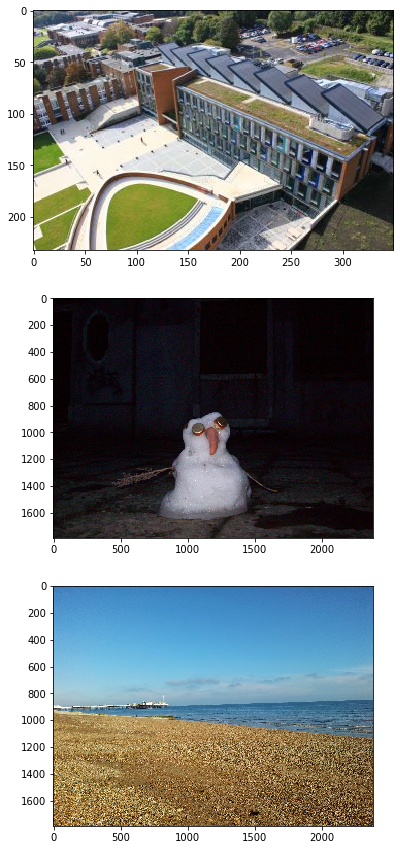

In [3]:
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import cv2
import numpy as np

plt.figure()
f,ax = plt.subplots(3,1, figsize = (15,15))

img = cv2.imread('./sussex.jpg')
img = img[:,:,::-1]

img_ss = cv2.imread('./sad_snowman.jpg')
img_ss = cv2.cvtColor(img_ss, cv2.COLOR_BGR2RGB)

img_bb = cv2.imread('./bri_beach.jpg')
img_bb = cv2.cvtColor(img_bb, cv2.COLOR_BGR2RGB)

ax[0].imshow(img)
ax[1].imshow(img_ss)
ax[2].imshow(img_bb)

# Uploading an image file
Try uploading custom images as before

In [5]:
# - Upload image named "NY.jpg"
import cv2
from google.colab import files
uploaded = files.upload()

Saving NY.jpg to NY.jpg


In [7]:
# After executing the cell above, check the uploaded files names 
# and the folder path where your files were uploaded.
import os
!ls
# Insert the correct image filename here and uncomment
full_path = "/content/" + "NY.jpg"
image = cv2.imread(full_path)

bri_beach.jpg  NY.jpg  sad_snowman.jpg	sample_data  sussex.jpg


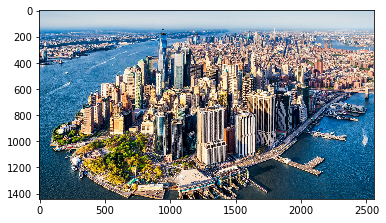

In [10]:
#plt.style.use("ggplot")
img_ny = image[:,:,::-1]
plt.imshow(img_ny)

# Image histograms
Let's play around with image histograms a bit to see how they can be used
1. Use matplotlib to plot the histogram of a grayscale image. Don't forget to flatten the spatial dimensions out!
2. Experiment with changing the number of histogram bins. Look at the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
3. What can we do to make histograms of RGB images? Read the [histogram documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) for some ideas. Hint, we want the data passed to plt.hist to have shape [num_of_pixels, 3] so look at using numpy.reshape.
4. Load in 2 images of different scenes (e.g. beach and snowman) do the histogram looks very different? use matplotlibs suplot functionality to put the images and histograms on the same figure
5. Try doing histogram equalisation (using [opencv2](https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)) on the gray image

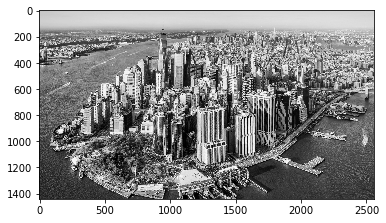

In [11]:
img_gray = np.mean(img_ny, axis=2)
imgplot = plt.imshow(img_gray, cmap="gray")
#imgplot.set_cmap("gray")

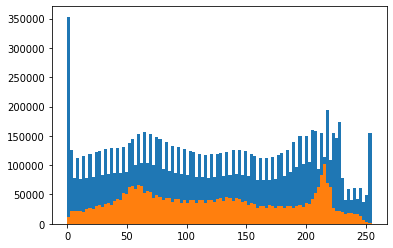

In [9]:
plt.hist(img_ny.flatten(), bins=100)
plt.hist(img_gray.flatten(), bins=100)
plt.show()

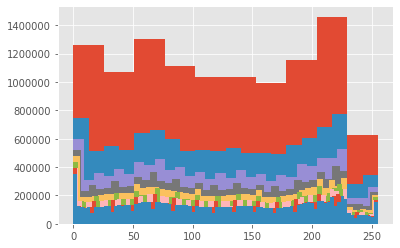

In [15]:
for i in range(1,10):
  plt.hist(img_ny.flatten(), bins=int(i*10))
  plt.show

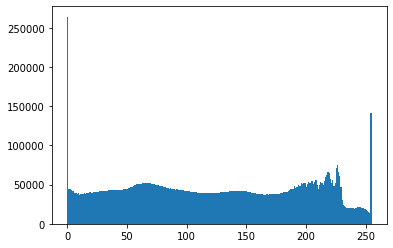

In [11]:
plt.hist(img_ny.flatten(), bins=np.arange(256))
plt.show()

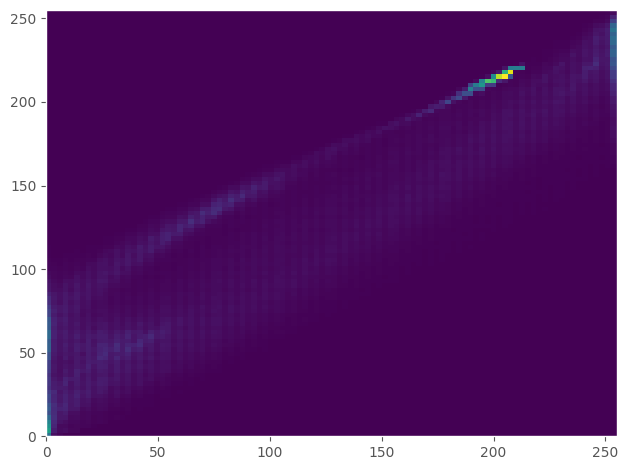

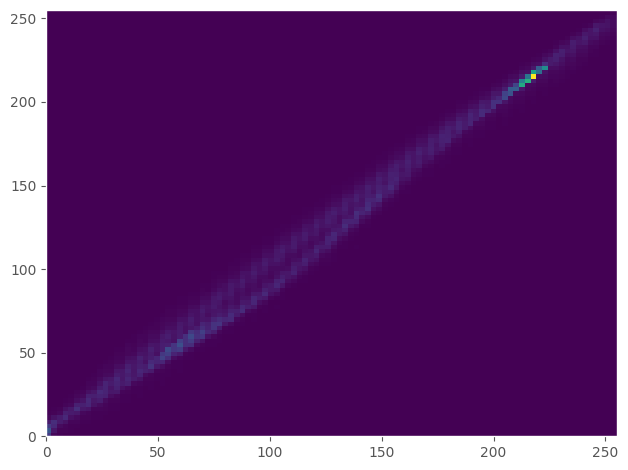

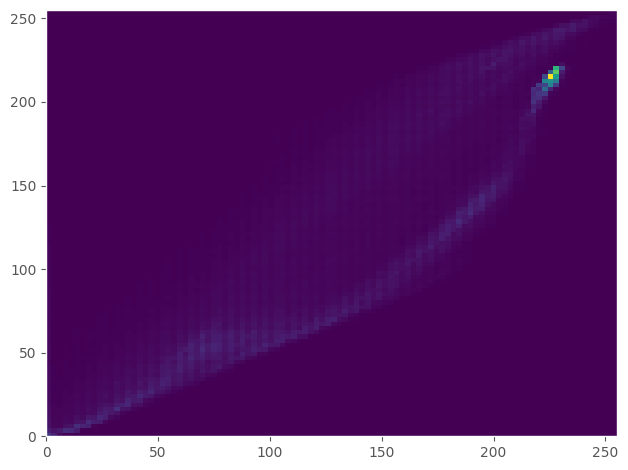

In [75]:
# - 2D histogram fun with NY image (3 colour channels) vs grayNY
for i in range(3):
  fig, ax = plt.subplots(tight_layout=True)
  hist = ax.hist2d(img_ny[:,:,i].flatten(), img_gray.flatten(), bins=100)

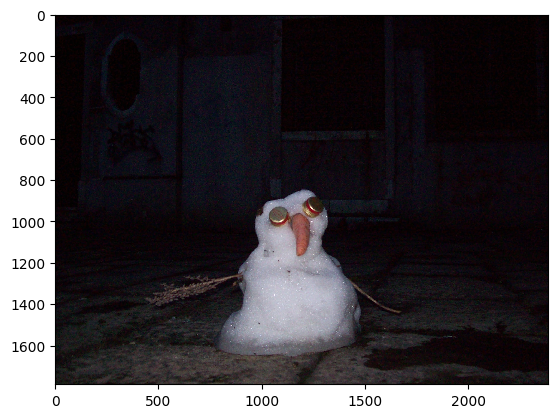

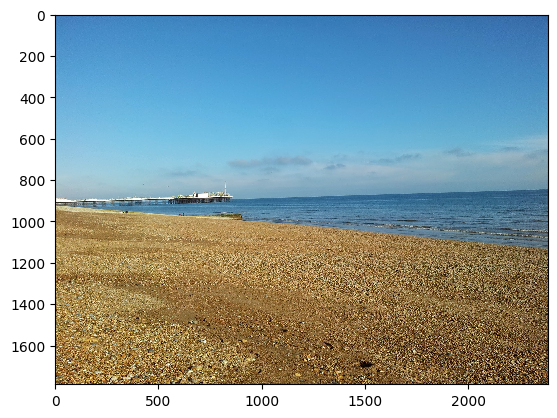

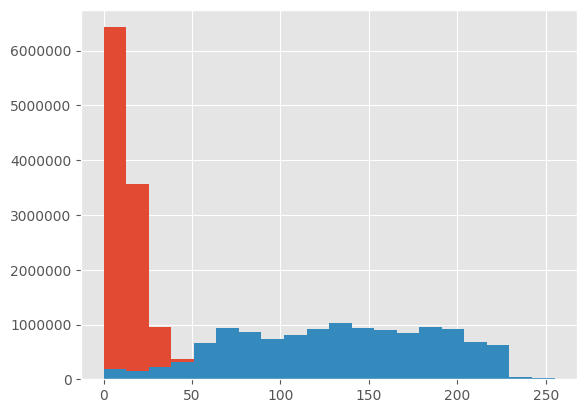

In [66]:
# - Snowman vs Beach image and histogram
plt.style.use("default")
plt.imshow(img_ss)
plt.show()
plt.imshow(img_bb)
plt.show()
plt.style.use("ggplot")
plt.hist(img_ss.flatten(), bins=20)
plt.hist(img_bb.flatten(), bins=20)
plt.show()

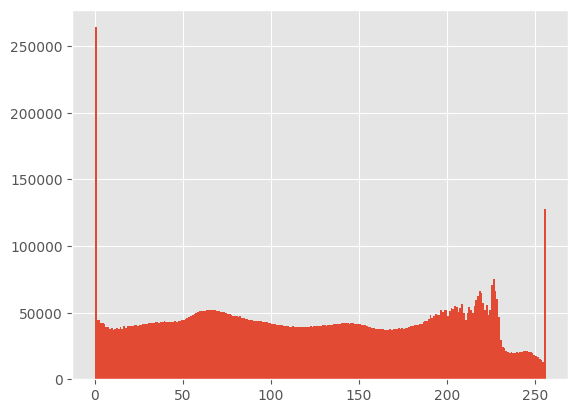

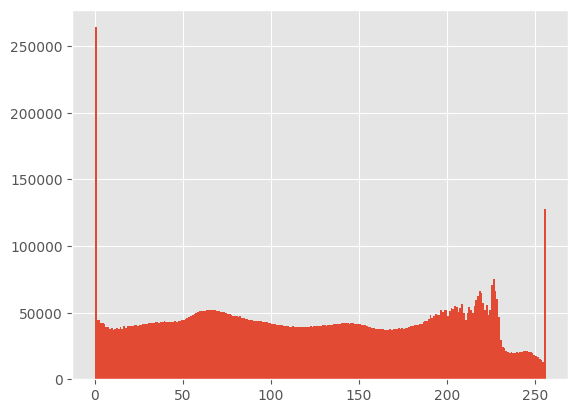

In [73]:
# - flatten() vs ravel()
plt.hist(img_ny.ravel(),256,[0,256]); plt.show()
plt.hist(img_ny.flatten(),256,[0,256]); plt.show()

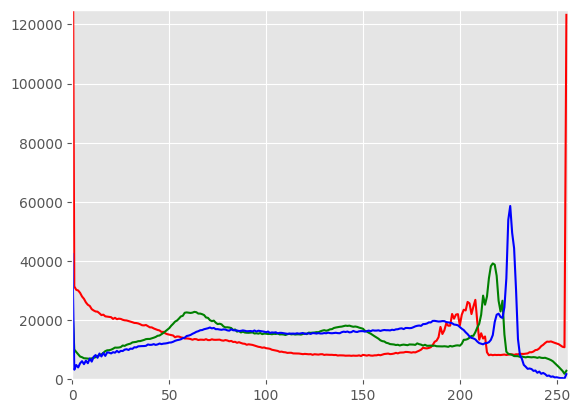

In [70]:
# - Histogram for colour channels of a given image
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_ny],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.ylim([0,125000])
plt.show()

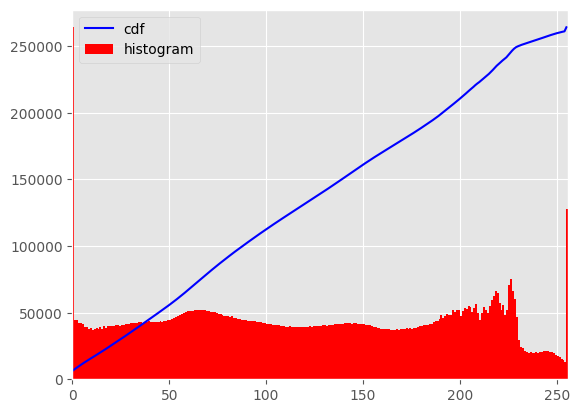

In [80]:
# - Numpy histogram equalization implementation:

img = np.copy(img_ny)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [0]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

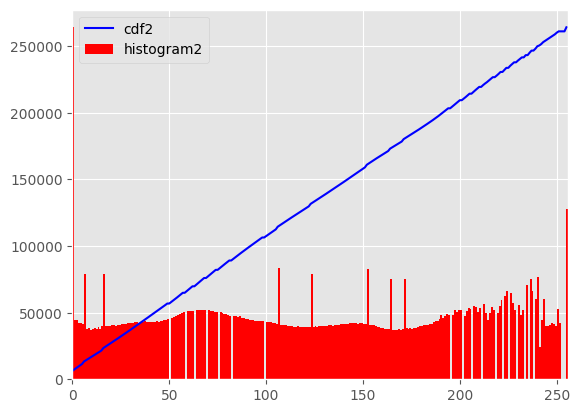

In [84]:
img2 = cdf[img]

hist2, bins2 = np.histogram(img2.flatten(),256,[0,256]) 

cdf2 = hist2.cumsum()
cdf2_normalized = cdf2 * hist2.max()/cdf2.max()

plt.plot(cdf2_normalized, color="b")
plt.hist(img2.flatten(),256,[0,256], color = "r")
plt.xlim([0,256])
plt.legend(("cdf2", "histogram2"), loc = "upper left")
plt.show()

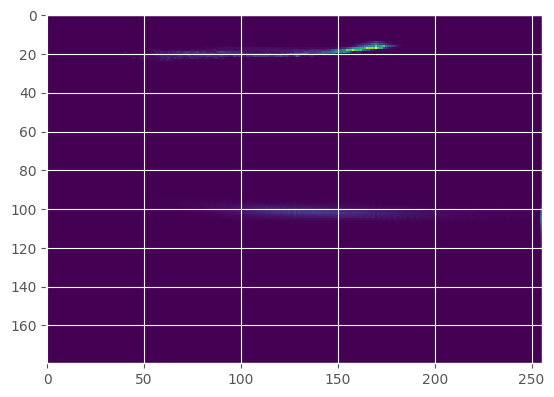

In [96]:
# - OpenCV plot 2D histogram
hsv = cv2.cvtColor(img_bb,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist)

# 1D Convolutions
Let's start with 1D convolutions, and ignoring the ends of the array.
1. Write your own convolution function to apply the filter [-1, 0, 1] to the array x. What does this do? Alternatively, use [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) making sure you check the 'mode' arguments. Plot the response of this function.
2. Plot the original signal on the same plot as your convolved output. You can make multiple calls to plt.plot which draw the results on the same axis. Note that your output may be shorter as we ignored the ends of the array. Note, using plt.plot or plt.scatter where x is the array position.
3. Next try applying the filter [0.1, 0.8, 0.1] to the array. What does this do? How can you increase the strength of the effect?


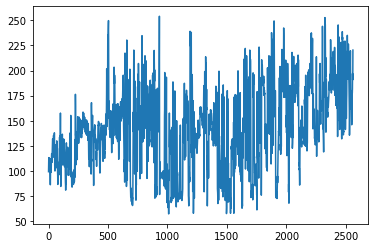

In [12]:
# Take a row of the image to use as daya
y = img_gray[200, :]
# If we use range it counts from 0 to the length of y, and we can see our 1D signal
plt.plot(range(len(y)), y)
plt.show()

In [0]:
fltr = [-1,0,1]
y2 = np.zeros_like(y)

for i in range(len(y)-2):
  y2[i] = y[i]*fltr[0] + y[i+1]*fltr[1] + y[i+2]*fltr[2]

# - Removing 0 elements at end of array - Convolution returns an array of size:
# - Original - (filter.length - 1)
y2 = np.delete(y2, [len(y2)-1,len(y2)-2])

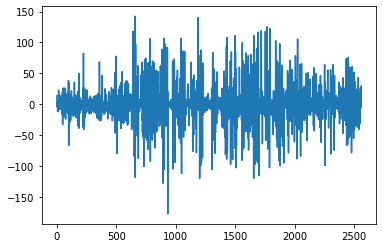

In [59]:
plt.plot(range(len(y2)),y2)
plt.show()

In [0]:
def one_d_convolutions(data, fltr):
  
  empty = np.zeros_like(data)

  if len(fltr):
    for i in range(len(data) - (len(fltr) - 1)):
      if len(fltr) == 1:
        empty[i] = y[i]*fltr[0]
      if len(fltr) == 2:
        empty[i] = y[i]*fltr[0] + y[i+1]*fltr[1]
      if len(fltr) == 3:
        empty[i] = y[i]*fltr[0] + y[i+1]*fltr[1] + y[i+2]*fltr[2]
      if len(fltr) == 4:
        empty[i] = y[i]*fltr[0] + y[i+1]*fltr[1] + y[i+2]*fltr[2] + y[i+1]*fltr[3]
  
  for i in range(len(fltr) - 1):
    empty = np.delete(empty, len(empty) - 1)

  plt.plot(range(len(data)),data)
  plt.title("Original Signal")
  plt.show()
  plt.plot(range(len(empty)),empty, color="C1")
  plt.title("Convolved Signal")
  plt.show()
  
  plt.plot(range(len(data)),data)
  plt.plot(range(len(empty)),empty)
  plt.show()


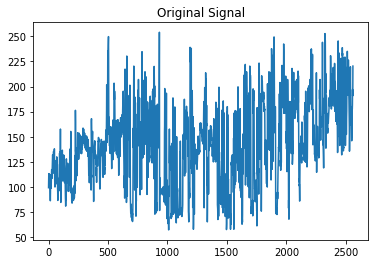

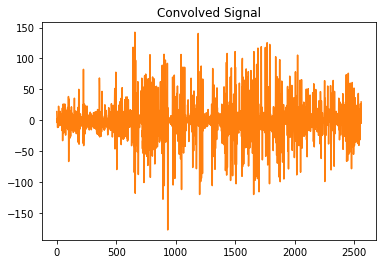

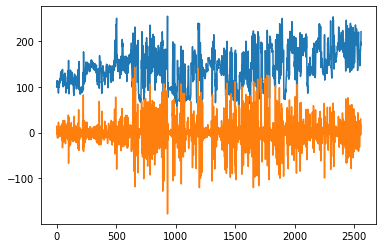

In [88]:
one_d_convolutions(y,fltr)

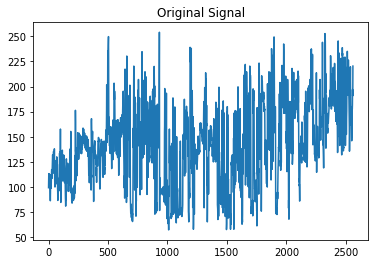

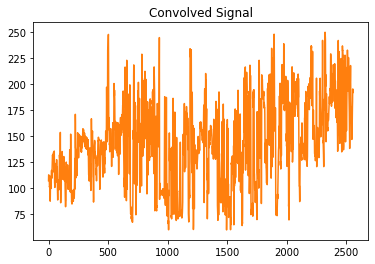

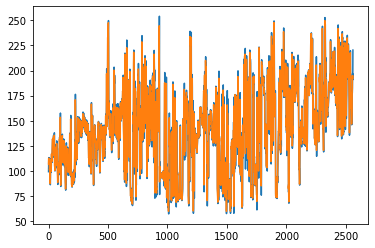

In [90]:
fltr2 =  [0.1, 0.8, 0.1] 
one_d_convolutions(y,fltr2)

# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.

+ Extend your convolution code to use zero-padding or reflection padding and arbitrary length convolutional kernels.

+ Extend your own convolution code to 2D

+ How might we measure the distance between histograms? Construct a distance measure and test it on the pair of images you loaded earlier. Working with a normalised histogram might help!

+ Test histogram equalisation on the color image, treating each color separately? Does it look a bit weird? Why? You should be able to improve matters by using the LAB colour space.

+ Upload 2 images containing either similar/different content, e.g. beach scenes, snowmen. Choose 1 image to modify and design a method to make the histogram of image 1 match image 2. This is a method of doing colour balancing with a known target color distribution.

